# Hackathon

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import matthews_corrcoef

In [2]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",1000)
pd.options.display.max_seq_items = 2000

In [3]:
data_train = pd.read_csv('train_labels.csv')
data_track = pd.read_csv('train_player_tracking.csv')
data_geo = pd.read_csv('geo_feats.csv')

/var/folders/z2/rdt7vxy91fz7f7gkqbtqbgk40000gn/T/ipykernel_24347/3780383852.py:3: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data_geo = pd.read_csv('geo_feats.csv')


In [4]:
data_train.head()

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact
0,58168_003392_0_38590_43854,58168_003392,2020-09-11T03:01:48.100Z,0,38590,43854,0
1,58168_003392_0_38590_41257,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41257,0
2,58168_003392_0_38590_41944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41944,0
3,58168_003392_0_38590_42386,58168_003392,2020-09-11T03:01:48.100Z,0,38590,42386,0
4,58168_003392_0_38590_47944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,47944,0


In [5]:
data_track.head()

,game_play,game_key,play_id,nfl_player_id,datetime,step,team,position,jersey_number,x_position,y_position,speed,distance,direction,orientation,acceleration,sa
0,58580_001136,58580,1136,44830,2021-10-10T21:08:20.900Z,-108,away,CB,22,61.59,42.60,1.11,0.11,320.33,263.93,0.71,-0.64
1,58580_001136,58580,1136,47800,2021-10-10T21:08:20.900Z,-108,away,DE,97,59.48,26.81,0.23,0.01,346.84,247.16,1.29,0.90
2,58580_001136,58580,1136,52444,2021-10-10T21:08:20.900Z,-108,away,FS,29,72.19,31.46,0.61,0.06,11.77,247.69,0.63,-0.33
3,58580_001136,58580,1136,46206,2021-10-10T21:08:20.900Z,-108,home,TE,86,57.37,22.12,0.37,0.04,127.85,63.63,0.69,0.62
4,58580_001136,58580,1136,52663,2021-10-10T21:08:20.900Z,-108,away,ILB,48,63.25,27.50,0.51,0.05,183.62,253.71,0.31,0.31


### Preprocess Data Keys

In [6]:
!which python

/Users/ET92ZFW/Projects/ML4Askuity/8_Hackathon/venv-hackathon/bin/python


In [7]:
data_train.describe()

,step,nfl_player_id_1,contact
count,4.721618e+06,4.721618e+06,4.721618e+06
mean,4.074472e+01,4.249579e+04,1.366523e-02
std,2.683546e+01,4.342500e+03,1.160969e-01
min,0.000000e+00,2.551100e+04,0.000000e+00
25%,1.900000e+01,4.007000e+04,0.000000e+00
50%,3.800000e+01,4.266700e+04,0.000000e+00
75%,5.900000e+01,4.500500e+04,0.000000e+00
max,1.720000e+02,5.398500e+04,1.000000e+00


In [8]:
data_train.isna().sum()

contact_id         0
game_play          0
datetime           0
step               0
nfl_player_id_1    0
nfl_player_id_2    0
contact            0
dtype: int64

In [9]:
data_train.shape

(4721618, 7)

In [10]:
# data_train['game_key'] = data_train.contact_id.str.split("_", expand=True)[0]

In [11]:
# data_train['play_id'] = data_train.contact_id.str.split("_", expand=True)[1]

In [10]:
data_train['game_play'] = data_train.contact_id.str.split("_", expand=True)[0] \
                          + '_' \
                          + data_train.contact_id.str.split("_", expand=True)[1]

In [15]:
# data_train['play_id'] = data_train['play_id'].astype('int')
# data_train['game_key'] = data_train['game_key'].astype('int')
data_train['nfl_player_id_1'] = data_train['nfl_player_id_1'].astype('str')
data_train['nfl_player_id_2'] = data_train['nfl_player_id_2'].astype('str')
data_train['step'] = data_train['step'].astype('str')

In [16]:
data_train.head()

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact
0,58168_003392_0_38590_43854,58168_003392,2020-09-11T03:01:48.100Z,0,38590,43854,0
1,58168_003392_0_38590_41257,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41257,0
2,58168_003392_0_38590_41944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41944,0
3,58168_003392_0_38590_42386,58168_003392,2020-09-11T03:01:48.100Z,0,38590,42386,0
4,58168_003392_0_38590_47944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,47944,0


In [17]:
data_train.dtypes

contact_id         object
game_play          object
datetime           object
step               object
nfl_player_id_1    object
nfl_player_id_2    object
contact             int64
dtype: object

In [18]:
data_track.dtypes

game_play         object
game_key           int64
play_id            int64
nfl_player_id      int64
datetime          object
step               int64
team              object
position          object
jersey_number      int64
x_position       float64
y_position       float64
speed            float64
distance         float64
direction        float64
orientation      float64
acceleration     float64
sa               float64
dtype: object

In [19]:
data_track['nfl_player_id'] = data_track['nfl_player_id'].astype('str')
# data_track['game_key'] = data_track['game_key'].astype('str')
# data_track['play_id'] = data_track['play_id'].astype('str')
data_track['step'] = data_track['step'].astype('str')

### Exploration

In [21]:
# Only 16 times in all of dataset has player made contact in the first two steps of the game
data_train[data_train.step.isin(['0','1'])].groupby('contact').step.count()

contact
0    121380
1        16
Name: step, dtype: int64

### Merge Data

In [22]:
# QC tracking data
data_track.groupby(['game_play', 'nfl_player_id','step']).datetime.count().sort_values(ascending=False)
# so the data is unique at game_play, player_id, step level

game_play     nfl_player_id  step
58168_003392  37084          -1      1
58491_001948  42033          37      1
                             35      1
                             34      1
                             33      1
                                    ..
58273_003282  39993          32      1
                             31      1
                             30      1
                             3       1
58582_003121  52619          99      1
Name: datetime, Length: 1353053, dtype: int64

In [23]:
# Check to see if we have equal number of distinct datetime and step values. Validates the assumption is right
test = data_track.groupby(['game_play', 'nfl_player_id'])['datetime','step'].nunique()
test[test.datetime!=test.step]

/var/folders/z2/rdt7vxy91fz7f7gkqbtqbgk40000gn/T/ipykernel_24347/2621276614.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test = data_track.groupby(['game_play', 'nfl_player_id'])['datetime','step'].nunique()


,,datetime,step
game_play,nfl_player_id,,


In [24]:
data_train = data_train.merge(data_track, left_on = ['game_play', 'nfl_player_id_1', 'step'], \
                 right_on = ['game_play', 'nfl_player_id', 'step'], how ='left',suffixes=[None,'_id_1'])

In [25]:
data_train.isna().sum()

contact_id         0
game_play          0
datetime           0
step               0
nfl_player_id_1    0
nfl_player_id_2    0
contact            0
game_key           0
play_id            0
nfl_player_id      0
datetime_id_1      0
team               0
position           0
jersey_number      0
x_position         0
y_position         0
speed              0
distance           0
direction          0
orientation        0
acceleration       0
sa                 0
dtype: int64

In [26]:
data_train.head()

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact,game_key,play_id,nfl_player_id,datetime_id_1,team,position,jersey_number,x_position,y_position,speed,distance,direction,orientation,acceleration,sa
0,58168_003392_0_38590_43854,58168_003392,2020-09-11T03:01:48.100Z,0,38590,43854,0,58168,3392,38590,2020-09-11T03:01:48.100Z,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58
1,58168_003392_0_38590_41257,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41257,0,58168,3392,38590,2020-09-11T03:01:48.100Z,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58
2,58168_003392_0_38590_41944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41944,0,58168,3392,38590,2020-09-11T03:01:48.100Z,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58
3,58168_003392_0_38590_42386,58168_003392,2020-09-11T03:01:48.100Z,0,38590,42386,0,58168,3392,38590,2020-09-11T03:01:48.100Z,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58
4,58168_003392_0_38590_47944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,47944,0,58168,3392,38590,2020-09-11T03:01:48.100Z,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58


In [27]:
data_train = data_train.merge(data_track, left_on = ['game_play', 'nfl_player_id_2','step'], \
                 right_on = ['game_play', 'nfl_player_id', 'step'], how ='left',suffixes=['_id_1','_id_2'])

/var/folders/z2/rdt7vxy91fz7f7gkqbtqbgk40000gn/T/ipykernel_24347/563146215.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'datetime_id_1'} in the result is deprecated and will raise a MergeError in a future version.
  data_train = data_train.merge(data_track, left_on = ['game_play', 'nfl_player_id_2','step'], \


In [28]:
data_train.isna().sum()

contact_id                 0
game_play                  0
datetime_id_1              0
step                       0
nfl_player_id_1            0
nfl_player_id_2            0
contact                    0
game_key_id_1              0
play_id_id_1               0
nfl_player_id_id_1         0
datetime_id_1              0
team_id_1                  0
position_id_1              0
jersey_number_id_1         0
x_position_id_1            0
y_position_id_1            0
speed_id_1                 0
distance_id_1              0
direction_id_1             0
orientation_id_1           0
acceleration_id_1          0
sa_id_1                    0
game_key_id_2         410633
play_id_id_2          410633
nfl_player_id_id_2    410633
datetime_id_2         410633
team_id_2             410633
position_id_2         410633
jersey_number_id_2    410633
x_position_id_2       410633
y_position_id_2       410633
speed_id_2            410633
distance_id_2         410633
direction_id_2        410633
orientation_id

In [29]:
data_train.drop("nfl_player_id_id_1", axis=1, inplace=True)
data_train.drop("nfl_player_id_id_2", axis=1, inplace=True)

In [30]:
data_train[(data_train.nfl_player_id_2!='G') & (data_train.position_id_2.isna())]

,contact_id,game_play,datetime_id_1,step,nfl_player_id_1,nfl_player_id_2,contact,game_key_id_1,play_id_id_1,datetime_id_1,team_id_1,position_id_1,jersey_number_id_1,x_position_id_1,y_position_id_1,speed_id_1,distance_id_1,direction_id_1,orientation_id_1,acceleration_id_1,sa_id_1,game_key_id_2,play_id_id_2,datetime_id_2,team_id_2,position_id_2,jersey_number_id_2,x_position_id_2,y_position_id_2,speed_id_2,distance_id_2,direction_id_2,orientation_id_2,acceleration_id_2,sa_id_2


### Feature Engineering

In [28]:
data_train.head()

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact,game_key,play_id,team_id_1,position_id_1,jersey_number_id_1,x_position_id_1,y_position_id_1,speed_id_1,distance_id_1,direction_id_1,orientation_id_1,acceleration_id_1,sa_id_1,team_id_2,position_id_2,jersey_number_id_2,x_position_id_2,y_position_id_2,speed_id_2,distance_id_2,direction_id_2,orientation_id_2,acceleration_id_2,sa_id_2
0,58168_003392_0_38590_43854,58168_003392,2020-09-11T03:01:48.100Z,0,38590,43854,0,58168,3392,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58,away,OLB,57.0,41.99,16.79,0.74,0.06,263.92,294.74,1.74,1.74
1,58168_003392_0_38590_41257,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41257,0,58168,3392,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58,away,CB,21.0,45.77,15.59,0.67,0.07,180.38,270.88,0.34,0.08
2,58168_003392_0_38590_41944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41944,0,58168,3392,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58,away,DT,92.0,42.00,22.85,0.68,0.08,234.17,282.07,0.81,0.81
3,58168_003392_0_38590_42386,58168_003392,2020-09-11T03:01:48.100Z,0,38590,42386,0,58168,3392,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58,away,ILB,55.0,45.87,23.89,0.61,0.06,221.19,269.45,1.11,1.10
4,58168_003392_0_38590_47944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,47944,0,58168,3392,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58,away,DE,94.0,42.10,26.58,0.20,0.03,240.11,266.04,1.63,1.23


In [29]:
data_train[data_train.contact==1]

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact,game_key,play_id,team_id_1,position_id_1,jersey_number_id_1,x_position_id_1,y_position_id_1,speed_id_1,distance_id_1,direction_id_1,orientation_id_1,acceleration_id_1,sa_id_1,team_id_2,position_id_2,jersey_number_id_2,x_position_id_2,y_position_id_2,speed_id_2,distance_id_2,direction_id_2,orientation_id_2,acceleration_id_2,sa_id_2
809,58168_003392_3_41944_42565,58168_003392,2020-09-11T03:01:48.400Z,3,41944,42565,1,58168,3392,away,DT,92,41.78,22.56,1.43,0.15,217.49,287.37,1.56,1.51,home,C,62.0,40.70,23.02,1.66,0.17,189.20,109.99,1.29,1.28
1062,58168_003392_4_41944_42565,58168_003392,2020-09-11T03:01:48.500Z,4,41944,42565,1,58168,3392,away,DT,92,41.67,22.38,1.83,0.21,212.07,288.29,1.55,1.47,home,C,62.0,40.68,22.85,1.80,0.18,188.04,117.12,0.84,0.84
1163,58168_003392_4_37084_38567,58168_003392,2020-09-11T03:01:48.500Z,4,37084,38567,1,58168,3392,away,DE,99,41.54,20.00,1.07,0.11,254.82,257.32,0.41,0.40,home,T,71.0,40.82,19.54,1.72,0.20,125.75,103.92,1.07,1.05
1289,58168_003392_5_43854_46445,58168_003392,2020-09-11T03:01:48.600Z,5,43854,46445,1,58168,3392,away,OLB,57,41.49,16.61,1.23,0.12,234.00,312.29,1.08,0.37,home,TE,48.0,40.67,17.42,1.63,0.16,155.99,114.56,0.33,0.16
1315,58168_003392_5_41944_42565,58168_003392,2020-09-11T03:01:48.600Z,5,41944,42565,1,58168,3392,away,DT,92,41.58,22.20,2.00,0.20,208.64,295.28,1.38,1.23,home,C,62.0,40.65,22.66,1.91,0.19,187.69,124.81,0.38,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720589,58582_003121_87_39971_G,58582_003121,2021-10-12T02:42:28.700Z,87,39971,G,1,58582,3121,away,CB,27,60.68,42.92,0.00,0.00,151.43,68.59,0.01,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4720842,58582_003121_88_39971_G,58582_003121,2021-10-12T02:42:28.800Z,88,39971,G,1,58582,3121,away,CB,27,60.68,42.92,0.00,0.00,152.11,68.59,0.01,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4721095,58582_003121_89_39971_G,58582_003121,2021-10-12T02:42:28.900Z,89,39971,G,1,58582,3121,away,CB,27,60.68,42.92,0.00,0.00,153.98,67.63,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4721348,58582_003121_90_39971_G,58582_003121,2021-10-12T02:42:29.000Z,90,39971,G,1,58582,3121,away,CB,27,60.68,42.92,0.00,0.00,154.71,67.63,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
data_train[(data_train.nfl_player_id_2=='38567') & (data_train.step==2)]

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact,game_key,play_id,team_id_1,position_id_1,jersey_number_id_1,x_position_id_1,y_position_id_1,speed_id_1,distance_id_1,direction_id_1,orientation_id_1,acceleration_id_1,sa_id_1,team_id_2,position_id_2,jersey_number_id_2,x_position_id_2,y_position_id_2,speed_id_2,distance_id_2,direction_id_2,orientation_id_2,acceleration_id_2,sa_id_2
598,58168_003392_2_38556_38567,58168_003392,2020-09-11T03:01:48.300Z,2,38556,38567,0,58168,3392,away,OLB,59,41.80,30.50,1.14,0.10,224.84,231.53,1.88,1.84,home,T,71.0,40.53,19.75,1.08,0.11,131.65,94.89,0.83,0.83
618,58168_003392_2_37211_38567,58168_003392,2020-09-11T03:01:48.300Z,2,37211,38567,0,58168,3392,home,FB,42,39.71,16.96,1.03,0.09,130.90,82.44,2.05,2.05,home,T,71.0,40.53,19.75,1.08,0.11,131.65,94.89,0.83,0.83
657,58168_003392_2_37084_38567,58168_003392,2020-09-11T03:01:48.300Z,2,37084,38567,0,58168,3392,away,DE,99,41.74,20.07,0.87,0.09,262.83,256.62,0.97,0.95,home,T,71.0,40.53,19.75,1.08,0.11,131.65,94.89,0.83,0.83


In [31]:
data_track[data_track.nfl_player_id=='38567'].head()

,game_play,game_key,play_id,nfl_player_id,datetime,step,team,position,jersey_number,x_position,y_position,speed,distance,direction,orientation,acceleration,sa
1073503,58168_003392,58168,3392,38567,2020-09-11T03:01:29.600Z,-185,home,T,71,37.19,22.01,0.04,0.01,215.85,262.57,0.08,0.03
1073522,58168_003392,58168,3392,38567,2020-09-11T03:01:29.700Z,-184,home,T,71,37.19,22.00,0.07,0.01,220.77,266.59,0.11,0.09
1073555,58168_003392,58168,3392,38567,2020-09-11T03:01:29.800Z,-183,home,T,71,37.18,21.98,0.13,0.02,210.04,272.35,0.18,0.18
1073561,58168_003392,58168,3392,38567,2020-09-11T03:01:29.900Z,-182,home,T,71,37.17,21.97,0.12,0.01,213.20,275.63,0.09,0.08
1073589,58168_003392,58168,3392,38567,2020-09-11T03:01:30.000Z,-181,home,T,71,37.17,21.97,0.08,0.00,225.68,278.60,0.08,-0.06


In [31]:
data_track_eng = data_track[['game_play', 'nfl_player_id', 'step'
                            ,'x_position', 'y_position', 'speed', 'distance', 'direction', 'orientation'
                            ,'acceleration', 'sa']]

In [32]:
data_track_eng = data_track_eng.sort_values(['game_play', 'nfl_player_id', 'step'])

In [33]:
features = ['x_position', 'y_position', 'speed', 'distance', 'direction',\
                  'orientation', 'acceleration', 'sa']

features_lag1 = ['x_position_lag1', 'y_position_lag1', 'speed_lag1',\
                'distance_lag1', 'direction_lag1', 'orientation_lag1',\
                'acceleration_lag1', 'sa_lag1']

features_lag2 = ['x_position_lag2', 'y_position_lag2', 'speed_lag2',\
                'distance_lag2', 'direction_lag2', 'orientation_lag2',\
                'acceleration_lag2', 'sa_lag2']

In [34]:
data_track_eng[features_lag1] = \
                data_track_eng.groupby(['game_play', 'nfl_player_id'])\
                [features].shift(1)

In [35]:
data_track_eng[features_lag2] = \
                data_track_eng.groupby(['game_play', 'nfl_player_id'])\
                [features].shift(2)

In [37]:
data_track_eng.head()

,game_play,game_key,play_id,nfl_player_id,datetime,step,x_position,y_position,speed,distance,direction,orientation,acceleration,sa,x_position_lag1,y_position_lag1,speed_lag1,distance_lag1,direction_lag1,orientation_lag1,acceleration_lag1,sa_lag1,x_position_lag2,y_position_lag2,speed_lag2,distance_lag2,direction_lag2,orientation_lag2,acceleration_lag2,sa_lag2
1073505,58168_003392,58168,3392,37084,2020-09-11T03:01:29.600Z,-185,42.91,20.14,0.15,0.02,145.50,326.04,0.33,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1073534,58168_003392,58168,3392,37084,2020-09-11T03:01:29.700Z,-184,42.92,20.13,0.19,0.02,137.38,323.44,0.30,0.28,42.91,20.14,0.15,0.02,145.50,326.04,0.33,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1073554,58168_003392,58168,3392,37084,2020-09-11T03:01:29.800Z,-183,42.94,20.11,0.25,0.03,142.93,321.67,0.32,0.31,42.92,20.13,0.19,0.02,137.38,323.44,0.30,0.28,42.91,20.14,0.15,0.02,145.50,326.04,0.33,0.28
1073560,58168_003392,58168,3392,37084,2020-09-11T03:01:29.900Z,-182,42.95,20.09,0.26,0.02,144.15,319.22,0.19,0.18,42.94,20.11,0.25,0.03,142.93,321.67,0.32,0.31,42.92,20.13,0.19,0.02,137.38,323.44,0.30,0.28
1073591,58168_003392,58168,3392,37084,2020-09-11T03:01:30.000Z,-181,42.97,20.07,0.25,0.02,139.81,316.21,0.04,0.04,42.95,20.09,0.26,0.02,144.15,319.22,0.19,0.18,42.94,20.11,0.25,0.03,142.93,321.67,0.32,0.31


In [36]:
feats_diff_within = ['speed','distance', 'direction', 'orientation', 'acceleration', 'sa']

for feats in feats_diff_within:
    data_track_eng[feats + '_diff_w' + '_lag1' + '_lag2'] = data_track_eng[feats+'_lag1'] - data_track_eng[feats+'_lag2']
    data_track_eng[feats + '_diff_w' + '_lag1'] = data_track_eng[feats] - data_track_eng[feats+'_lag1']

In [37]:
# columns to keep

keys = ['game_play', 'nfl_player_id', 'step']

feats_diff_w_cols = [col + '_diff_w' + '_lag1' + '_lag2' for col in feats_diff_within] + \
                    [col + '_diff_w' + '_lag1' for col in feats_diff_within]

feats_lag = ['x_position_lag1', 'y_position_lag1', 'x_position_lag2', 'y_position_lag2']

all_cols = keys + feats_diff_w_cols + feats_lag

data_track_eng[all_cols]

,game_play,nfl_player_id,step,speed_diff_w_lag1_lag2,distance_diff_w_lag1_lag2,direction_diff_w_lag1_lag2,orientation_diff_w_lag1_lag2,acceleration_diff_w_lag1_lag2,sa_diff_w_lag1_lag2,speed_diff_w_lag1,distance_diff_w_lag1,direction_diff_w_lag1,orientation_diff_w_lag1,acceleration_diff_w_lag1,sa_diff_w_lag1,x_position_lag1,y_position_lag1,x_position_lag2,y_position_lag2
1080990,58168_003392,37084,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1080799,58168_003392,37084,-10,NaN,NaN,NaN,NaN,NaN,NaN,-0.16,-0.02,-39.17,6.59,-0.68,-0.66,41.96,20.10,NaN,NaN
1076397,58168_003392,37084,-100,-0.16,-0.02,-39.17,6.59,-0.68,-0.66,0.33,0.04,63.94,-10.75,0.47,0.06,42.01,20.22,41.96,20.10
1076373,58168_003392,37084,-101,0.33,0.04,63.94,-10.75,0.47,0.06,-0.07,-0.01,-13.76,0.00,-0.07,-0.20,43.12,20.05,42.01,20.22
1076353,58168_003392,37084,-102,-0.07,-0.01,-13.76,0.00,-0.07,-0.20,-0.01,-0.01,-4.79,1.64,0.08,-0.02,43.18,20.05,43.12,20.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8843,58582_003121,52619,95,0.02,0.00,3.82,1.31,-0.02,0.20,0.03,0.00,0.75,3.73,-0.50,-0.16,59.32,22.13,59.18,22.13
8854,58582_003121,52619,96,0.03,0.00,0.75,3.73,-0.50,-0.16,0.04,0.01,-2.29,-3.93,-0.43,-0.06,59.46,22.13,59.32,22.13
8875,58582_003121,52619,97,0.04,0.01,-2.29,-3.93,-0.43,-0.06,0.03,0.00,-0.32,-2.10,-0.08,-0.06,59.61,22.13,59.46,22.13
8892,58582_003121,52619,98,0.03,0.00,-0.32,-2.10,-0.08,-0.06,0.00,0.00,-1.29,1.34,0.09,-0.14,59.76,22.14,59.61,22.13


In [38]:
# merging for player 1

feats_cols_id_1 = feats_diff_w_cols + feats_lag

feats_cols_id_1 = [feats + '_id_1' for feats in feats_cols_id_1]

new_cols_name = keys + feats_cols_id_1

data_track_eng_id_1 = data_track_eng[all_cols]

data_track_eng_id_1.columns = new_cols_name

data_track_eng_id_1.head()

,game_play,nfl_player_id,step,speed_diff_w_lag1_lag2_id_1,distance_diff_w_lag1_lag2_id_1,direction_diff_w_lag1_lag2_id_1,orientation_diff_w_lag1_lag2_id_1,acceleration_diff_w_lag1_lag2_id_1,sa_diff_w_lag1_lag2_id_1,speed_diff_w_lag1_id_1,distance_diff_w_lag1_id_1,direction_diff_w_lag1_id_1,orientation_diff_w_lag1_id_1,acceleration_diff_w_lag1_id_1,sa_diff_w_lag1_id_1,x_position_lag1_id_1,y_position_lag1_id_1,x_position_lag2_id_1,y_position_lag2_id_1
1080990,58168_003392,37084,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1080799,58168_003392,37084,-10,NaN,NaN,NaN,NaN,NaN,NaN,-0.16,-0.02,-39.17,6.59,-0.68,-0.66,41.96,20.10,NaN,NaN
1076397,58168_003392,37084,-100,-0.16,-0.02,-39.17,6.59,-0.68,-0.66,0.33,0.04,63.94,-10.75,0.47,0.06,42.01,20.22,41.96,20.10
1076373,58168_003392,37084,-101,0.33,0.04,63.94,-10.75,0.47,0.06,-0.07,-0.01,-13.76,0.00,-0.07,-0.20,43.12,20.05,42.01,20.22
1076353,58168_003392,37084,-102,-0.07,-0.01,-13.76,0.00,-0.07,-0.20,-0.01,-0.01,-4.79,1.64,0.08,-0.02,43.18,20.05,43.12,20.05


In [39]:
# merging for player 2

feats_cols_id_2 = feats_diff_w_cols + feats_lag

feats_cols_id_2 = [feats + '_id_2' for feats in feats_cols_id_2]

new_cols_name = keys + feats_cols_id_2

data_track_eng_id_2 = data_track_eng[all_cols]

data_track_eng_id_2.columns = new_cols_name

data_track_eng_id_2.head()

,game_play,nfl_player_id,step,speed_diff_w_lag1_lag2_id_2,distance_diff_w_lag1_lag2_id_2,direction_diff_w_lag1_lag2_id_2,orientation_diff_w_lag1_lag2_id_2,acceleration_diff_w_lag1_lag2_id_2,sa_diff_w_lag1_lag2_id_2,speed_diff_w_lag1_id_2,distance_diff_w_lag1_id_2,direction_diff_w_lag1_id_2,orientation_diff_w_lag1_id_2,acceleration_diff_w_lag1_id_2,sa_diff_w_lag1_id_2,x_position_lag1_id_2,y_position_lag1_id_2,x_position_lag2_id_2,y_position_lag2_id_2
1080990,58168_003392,37084,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1080799,58168_003392,37084,-10,NaN,NaN,NaN,NaN,NaN,NaN,-0.16,-0.02,-39.17,6.59,-0.68,-0.66,41.96,20.10,NaN,NaN
1076397,58168_003392,37084,-100,-0.16,-0.02,-39.17,6.59,-0.68,-0.66,0.33,0.04,63.94,-10.75,0.47,0.06,42.01,20.22,41.96,20.10
1076373,58168_003392,37084,-101,0.33,0.04,63.94,-10.75,0.47,0.06,-0.07,-0.01,-13.76,0.00,-0.07,-0.20,43.12,20.05,42.01,20.22
1076353,58168_003392,37084,-102,-0.07,-0.01,-13.76,0.00,-0.07,-0.20,-0.01,-0.01,-4.79,1.64,0.08,-0.02,43.18,20.05,43.12,20.05


In [40]:
data_train = data_train.merge(data_track_eng_id_1, left_on=['game_play', 'nfl_player_id_1', 'step']\
                 , right_on=keys, how='left')

In [41]:
data_train = data_train.merge(data_track_eng_id_2, left_on=['game_play', 'nfl_player_id_2', 'step']\
                 , right_on=keys, how='left')

In [44]:
data_train.head()

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact,game_key,play_id,team_id_1,position_id_1,jersey_number_id_1,x_position_id_1,y_position_id_1,speed_id_1,distance_id_1,direction_id_1,orientation_id_1,acceleration_id_1,sa_id_1,team_id_2,position_id_2,jersey_number_id_2,x_position_id_2,y_position_id_2,speed_id_2,distance_id_2,direction_id_2,orientation_id_2,acceleration_id_2,sa_id_2,nfl_player_id_x,speed_diff_w_lag1_lag2_id_1,distance_diff_w_lag1_lag2_id_1,direction_diff_w_lag1_lag2_id_1,orientation_diff_w_lag1_lag2_id_1,acceleration_diff_w_lag1_lag2_id_1,sa_diff_w_lag1_lag2_id_1,speed_diff_w_lag1_id_1,distance_diff_w_lag1_id_1,direction_diff_w_lag1_id_1,orientation_diff_w_lag1_id_1,acceleration_diff_w_lag1_id_1,sa_diff_w_lag1_id_1,x_position_lag1_id_1,y_position_lag1_id_1,x_position_lag2_id_1,y_position_lag2_id_1,nfl_player_id_y,speed_diff_w_lag1_lag2_id_2,distance_diff_w_lag1_lag2_id_2,direction_diff_w_lag1_lag2_id_2,orientation_diff_w_lag1_lag2_id_2,acceleration_diff_w_lag1_lag2_id_2,sa_diff_w_lag1_lag2_id_2,speed_diff_w_lag1_id_2,distance_diff_w_lag1_id_2,direction_diff_w_lag1_id_2,orientation_diff_w_lag1_id_2,acceleration_diff_w_lag1_id_2,sa_diff_w_lag1_id_2,x_position_lag1_id_2,y_position_lag1_id_2,x_position_lag2_id_2,y_position_lag2_id_2
0,58168_003392_0_38590_43854,58168_003392,2020-09-11T03:01:48.100Z,0,38590,43854,0,58168,3392,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58,away,OLB,57.0,41.99,16.79,0.74,0.06,263.92,294.74,1.74,1.74,38590,0.1,0.01,1.27,1.42,0.04,0.06,0.14,0.02,1.04,1.57,0.12,0.12,40.3,25.33,40.27,25.36,43854,0.18,0.01,-0.28,6.78,0.28,0.32,0.24,0.02,-2.31,5.19,0.56,0.56,42.05,16.80,42.09,16.80
1,58168_003392_0_38590_41257,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41257,0,58168,3392,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58,away,CB,21.0,45.77,15.59,0.67,0.07,180.38,270.88,0.34,0.08,38590,0.1,0.01,1.27,1.42,0.04,0.06,0.14,0.02,1.04,1.57,0.12,0.12,40.3,25.33,40.27,25.36,41257,0.03,0.01,-5.05,0.00,-0.07,0.22,0.06,0.00,-4.43,0.85,0.05,0.20,45.77,15.66,45.78,15.73
2,58168_003392_0_38590_41944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41944,0,58168,3392,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58,away,DT,92.0,42.00,22.85,0.68,0.08,234.17,282.07,0.81,0.81,38590,0.1,0.01,1.27,1.42,0.04,0.06,0.14,0.02,1.04,1.57,0.12,0.12,40.3,25.33,40.27,25.36,41944,0.12,-0.02,-4.46,-2.25,0.11,0.12,0.20,0.03,-2.34,1.58,0.08,0.09,42.07,22.90,42.11,22.93
3,58168_003392_0_38590_42386,58168_003392,2020-09-11T03:01:48.100Z,0,38590,42386,0,58168,3392,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58,away,ILB,55.0,45.87,23.89,0.61,0.06,221.19,269.45,1.11,1.10,38590,0.1,0.01,1.27,1.42,0.04,0.06,0.14,0.02,1.04,1.57,0.12,0.12,40.3,25.33,40.27,25.36,42386,0.16,0.02,-9.26,-2.90,0.32,0.34,0.21,0.02,-8.55,-6.05,0.40,0.39,45.90,23.94,45.93,23.96
4,58168_003392_0_38590_47944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,47944,0,58168,3392,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58,away,DE,94.0,42.10,26.58,0.20,0.03,240.11,266.04,1.63,1.23,38590,0.1,0.01,1.27,1.42,0.04,0.06,0.14,0.02,1.04,1.57,0.12,0.12,40.3,25.33,40.27,25.36,47944,-0.28,-0.03,332.85,-2.78,0.34,-0.14,0.07,0.02,-97.37,-1.36,0.25,2.41,42.12,26.59,42.14,26.59


In [45]:
data_train.isna().sum()

contact_id                   0
game_play                    0
datetime                     0
step                         0
nfl_player_id_1              0
                         ...  
sa_diff_w_lag1_id_2     410633
x_position_lag1_id_2    410633
y_position_lag1_id_2    410633
x_position_lag2_id_2    410633
y_position_lag2_id_2    410633
Length: 65, dtype: int64

In [42]:
def Euclidean_Dist(df, cols_1=['x_coord','y_coord'], cols_2=['x_coord','y_coord']):
    return np.linalg.norm(df[cols_1].values - df[cols_2].values,
                   axis=1)

In [47]:
Euclidean_Dist(data_train, cols_1=['x_position_lag1_id_1','y_position_lag1_id_1'], \
               cols_2=['x_position_lag1_id_2','y_position_lag1_id_2'])

array([ 8.70766329, 11.10989649,  3.0062934 , ...,         nan,
               nan,         nan])

In [43]:
data_train['dist_lag2'] =  Euclidean_Dist(data_train, cols_1=['x_position_lag2_id_1','y_position_lag2_id_1'], \
               cols_2=['x_position_lag2_id_2','y_position_lag2_id_2'])

In [44]:
data_train['dist_lag1'] =  Euclidean_Dist(data_train, cols_1=['x_position_lag1_id_1','y_position_lag1_id_1'], \
               cols_2=['x_position_lag1_id_2','y_position_lag1_id_2'])

In [45]:
data_train['dist'] =  Euclidean_Dist(data_train, cols_1=['x_position_id_1','y_position_id_1'], \
               cols_2=['x_position_id_2','y_position_id_2'])

In [46]:
data_train['dist_lag1_lag2'] = data_train['dist_lag1'] - data_train['dist_lag2']

In [47]:
data_train['dist_current_lag1'] = data_train['dist'] - data_train['dist_lag1']

In [53]:
data_train

,contact_id,game_play,datetime,step,nfl_player_id_1,nfl_player_id_2,contact,game_key,play_id,team_id_1,position_id_1,jersey_number_id_1,x_position_id_1,y_position_id_1,speed_id_1,distance_id_1,direction_id_1,orientation_id_1,acceleration_id_1,sa_id_1,team_id_2,position_id_2,jersey_number_id_2,x_position_id_2,y_position_id_2,speed_id_2,distance_id_2,direction_id_2,orientation_id_2,acceleration_id_2,sa_id_2,nfl_player_id_x,speed_diff_w_lag1_lag2_id_1,distance_diff_w_lag1_lag2_id_1,direction_diff_w_lag1_lag2_id_1,orientation_diff_w_lag1_lag2_id_1,acceleration_diff_w_lag1_lag2_id_1,sa_diff_w_lag1_lag2_id_1,speed_diff_w_lag1_id_1,distance_diff_w_lag1_id_1,direction_diff_w_lag1_id_1,orientation_diff_w_lag1_id_1,acceleration_diff_w_lag1_id_1,sa_diff_w_lag1_id_1,x_position_lag1_id_1,y_position_lag1_id_1,x_position_lag2_id_1,y_position_lag2_id_1,nfl_player_id_y,speed_diff_w_lag1_lag2_id_2,distance_diff_w_lag1_lag2_id_2,direction_diff_w_lag1_lag2_id_2,orientation_diff_w_lag1_lag2_id_2,acceleration_diff_w_lag1_lag2_id_2,sa_diff_w_lag1_lag2_id_2,speed_diff_w_lag1_id_2,distance_diff_w_lag1_id_2,direction_diff_w_lag1_id_2,orientation_diff_w_lag1_id_2,acceleration_diff_w_lag1_id_2,sa_diff_w_lag1_id_2,x_position_lag1_id_2,y_position_lag1_id_2,x_position_lag2_id_2,y_position_lag2_id_2,dist_lag2,dist_lag1,dist,dist_lag1_lag2,dist_current_lag1
0,58168_003392_0_38590_43854,58168_003392,2020-09-11T03:01:48.100Z,0,38590,43854,0,58168,3392,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58,away,OLB,57.0,41.99,16.79,0.74,0.06,263.92,294.74,1.74,1.74,38590,0.10,0.01,1.27,1.42,0.04,0.06,0.14,0.02,1.04,1.57,0.12,0.12,40.30,25.33,40.27,25.36,43854,0.18,0.01,-0.28,6.78,0.28,0.32,0.24,0.02,-2.31,5.19,0.56,0.56,42.05,16.80,42.09,16.80,8.751343,8.707663,8.650763,-0.043679,-0.056900
1,58168_003392_0_38590_41257,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41257,0,58168,3392,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58,away,CB,21.0,45.77,15.59,0.67,0.07,180.38,270.88,0.34,0.08,38590,0.10,0.01,1.27,1.42,0.04,0.06,0.14,0.02,1.04,1.57,0.12,0.12,40.30,25.33,40.27,25.36,41257,0.03,0.01,-5.05,0.00,-0.07,0.22,0.06,0.00,-4.43,0.85,0.05,0.20,45.77,15.66,45.78,15.73,11.094909,11.109896,11.112592,0.014988,0.002695
2,58168_003392_0_38590_41944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,41944,0,58168,3392,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58,away,DT,92.0,42.00,22.85,0.68,0.08,234.17,282.07,0.81,0.81,38590,0.10,0.01,1.27,1.42,0.04,0.06,0.14,0.02,1.04,1.57,0.12,0.12,40.30,25.33,40.27,25.36,41944,0.12,-0.02,-4.46,-2.25,0.11,0.12,0.20,0.03,-2.34,1.58,0.08,0.09,42.07,22.90,42.11,22.93,3.048032,3.006293,2.948525,-0.041739,-0.057768
3,58168_003392_0_38590_42386,58168_003392,2020-09-11T03:01:48.100Z,0,38590,42386,0,58168,3392,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58,away,ILB,55.0,45.87,23.89,0.61,0.06,221.19,269.45,1.11,1.10,38590,0.10,0.01,1.27,1.42,0.04,0.06,0.14,0.02,1.04,1.57,0.12,0.12,40.30,25.33,40.27,25.36,42386,0.16,0.02,-9.26,-2.90,0.32,0.34,0.21,0.02,-8.55,-6.05,0.40,0.39,45.90,23.94,45.93,23.96,5.830575,5.769931,5.711716,-0.060644,-0.058215
4,58168_003392_0_38590_47944,58168_003392,2020-09-11T03:01:48.100Z,0,38590,47944,0,58168,3392,home,G,70,40.33,25.28,0.52,0.06,141.08,100.37,0.59,0.58,away,DE,94.0,42.10,26.58,0.20,0.03,240.11,266.04,1.63,1.23,38590,0.10,0.01,1.27,1.42,0.04,0.06,0.14,0.02,1.04,1.57,0.12,0.12,40.30,25.33,40.27,25.36,47944,-0.28,-0.03,332.85,-2.78,0.34,-0.14,0.07,0.02,-97.37,-1.36,0.25,2.41,42.12,26.59,42.14,26.59,2.238258,2.213594,2.196110,-0.024664,-0.017484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4721613,58582_003121_91_48220_G,58582_003121,2021-10-12T02:42:29.100Z,91,48220,G,0,58582,3121,home,G,65,33.18,25.26,2.55,0.26,95.39,152.22,0.43,-0.40,NaN,NaN,NaN,Na

### Building Model P-P

In [48]:
print(data_train[data_train.nfl_player_id_2 !='G'].isna().sum().to_string())

contact_id                            0
game_play                             0
datetime_id_1                         0
step                                  0
nfl_player_id_1                       0
nfl_player_id_2                       0
contact                               0
game_key_id_1                         0
play_id_id_1                          0
datetime_id_1                         0
team_id_1                             0
position_id_1                         0
jersey_number_id_1                    0
x_position_id_1                       0
y_position_id_1                       0
speed_id_1                            0
distance_id_1                         0
direction_id_1                        0
orientation_id_1                      0
acceleration_id_1                     0
sa_id_1                               0
game_key_id_2                         0
play_id_id_2                          0
datetime_id_2                         0
team_id_2                             0


In [49]:
data_train_pp = data_train[data_train.nfl_player_id_2 !='G']

In [52]:
target = ['contact']

features_current_id_1 = ['speed_id_1', 'distance_id_1', 'direction_id_1', 'orientation_id_1', 'acceleration_id_1', \
                         'sa_id_1']

features_current_id_2 = ['speed_id_2', 'distance_id_2', 'direction_id_2', 'orientation_id_2', 'acceleration_id_2', \
                         'sa_id_2']


features_lag_id_1 = ['speed_diff_w_lag1_lag2_id_1', 'distance_diff_w_lag1_lag2_id_1', 'direction_diff_w_lag1_lag2_id_1',\
                     'orientation_diff_w_lag1_lag2_id_1', 'acceleration_diff_w_lag1_lag2_id_1', \
                     'sa_diff_w_lag1_lag2_id_1', 'speed_diff_w_lag1_id_1', 'distance_diff_w_lag1_id_1', \
                     'direction_diff_w_lag1_id_1', 'orientation_diff_w_lag1_id_1', 'acceleration_diff_w_lag1_id_1', \
                     'sa_diff_w_lag1_id_1']

features_lag_id_2 = ['speed_diff_w_lag1_lag2_id_2', 'distance_diff_w_lag1_lag2_id_2', 'direction_diff_w_lag1_lag2_id_2',\
                     'orientation_diff_w_lag1_lag2_id_2', 'acceleration_diff_w_lag1_lag2_id_2', \
                     'sa_diff_w_lag1_lag2_id_2', 'speed_diff_w_lag1_id_2', 'distance_diff_w_lag1_id_2', \
                     'direction_diff_w_lag1_id_2', 'orientation_diff_w_lag1_id_2', 'acceleration_diff_w_lag1_id_2', \
                     'sa_diff_w_lag1_id_2']

features_dist = ['dist_lag2', 'dist_lag1', 'dist', 'dist_lag1_lag2', 'dist_current_lag1']

all_cols = features_current_id_1 + features_current_id_2 + features_lag_id_1 + features_lag_id_2 \
           + features_dist + target



In [53]:
data_train_pp_m = data_train_pp[all_cols]

In [54]:
data_train_pp_m.head()

,speed_id_1,distance_id_1,direction_id_1,orientation_id_1,acceleration_id_1,sa_id_1,speed_id_2,distance_id_2,direction_id_2,orientation_id_2,acceleration_id_2,sa_id_2,speed_diff_w_lag1_lag2_id_1,distance_diff_w_lag1_lag2_id_1,direction_diff_w_lag1_lag2_id_1,orientation_diff_w_lag1_lag2_id_1,acceleration_diff_w_lag1_lag2_id_1,sa_diff_w_lag1_lag2_id_1,speed_diff_w_lag1_id_1,distance_diff_w_lag1_id_1,direction_diff_w_lag1_id_1,orientation_diff_w_lag1_id_1,acceleration_diff_w_lag1_id_1,sa_diff_w_lag1_id_1,speed_diff_w_lag1_lag2_id_2,distance_diff_w_lag1_lag2_id_2,direction_diff_w_lag1_lag2_id_2,orientation_diff_w_lag1_lag2_id_2,acceleration_diff_w_lag1_lag2_id_2,sa_diff_w_lag1_lag2_id_2,speed_diff_w_lag1_id_2,distance_diff_w_lag1_id_2,direction_diff_w_lag1_id_2,orientation_diff_w_lag1_id_2,acceleration_diff_w_lag1_id_2,sa_diff_w_lag1_id_2,dist_lag2,dist_lag1,dist,dist_lag1_lag2,dist_current_lag1,contact
0,0.52,0.06,141.08,100.37,0.59,0.58,0.74,0.06,263.92,294.74,1.74,1.74,0.06,0.01,3.16,0.0,0.17,-0.16,0.09,0.01,81.07,22.47,-0.23,1.3,-0.09,-0.01,13.12,2.70,-0.13,-0.23,0.27,0.02,54.80,13.36,0.64,1.08,8.171328,8.124340,8.650763,-0.046988,0.526423,0
1,0.52,0.06,141.08,100.37,0.59,0.58,0.67,0.07,180.38,270.88,0.34,0.08,0.06,0.01,3.16,0.0,0.17,-0.16,0.09,0.01,81.07,22.47,-0.23,1.3,0.13,0.02,0.97,-1.38,-0.16,0.16,-0.47,-0.05,161.03,26.01,-0.47,0.88,6.871863,6.861385,11.112592,-0.010478,4.251207,0
2,0.52,0.06,141.08,100.37,0.59,0.58,0.68,0.08,234.17,282.07,0.81,0.81,0.06,0.01,3.16,0.0,0.17,-0.16,0.09,0.01,81.07,22.47,-0.23,1.3,-0.03,-0.01,-32.17,-1.58,-0.04,-0.16,0.62,0.07,107.00,-1.97,0.68,0.91,3.442005,3.453143,2.948525,0.011138,-0.504618,0
3,0.52,0.06,141.08,100.37,0.59,0.58,0.61,0.06,221.19,269.45,1.11,1.10,0.06,0.01,3.16,0.0,0.17,-0.16,0.09,0.01,81.07,22.47,-0.23,1.3,-0.05,0.00,4.01,-3.06,0.07,0.10,0.21,0.02,208.74,-11.72,0.60,0.61,6.121340,6.166036,5.711716,0.044696,-0.454320,0
4,0.52,0.06,141.08,100.37,0.59,0.58,0.20,0.03,240.11,266.04,1.63,1.23,0.06,0.01,3.16,0.0,0.17,-0.16,0.09,0.01,81.07,22.47,-0.23,1.3,-0.04,-0.01,-3.29,-1.02,-0.11,-0.01,-0.87,-0.08,-89.15,-41.51,1.45,1.36,3.279893,3.383622,2.196110,0.103729,-1.187512,0


In [55]:
X = data_train_pp_m.drop('contact', axis=1)
y = data_train_pp_m['contact']

#### Baseline Model

In [56]:
#Total Contacts

len(data_train_pp_m[data_train_pp_m.contact==1])

47708

In [57]:
#Total Length

data_train_pp_m.shape[0]

4310985

In [81]:
### Writing data for submission
data_train_pp_m.to_csv('training_pp.csv',index=False)

In [59]:
#data_train_pp.sample(frac=.20).to_csv('data_train_pp_sample_20.csv')

In [60]:
#Ratio of total contacts to total length

len(data_train_pp_m[data_train_pp_m.contact==1])/data_train_pp_m.shape[0]

0.011066612386728323

In [61]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [62]:
X_train.head()

,speed_id_1,distance_id_1,direction_id_1,orientation_id_1,acceleration_id_1,sa_id_1,speed_id_2,distance_id_2,direction_id_2,orientation_id_2,acceleration_id_2,sa_id_2,speed_diff_w_lag1_lag2_id_1,distance_diff_w_lag1_lag2_id_1,direction_diff_w_lag1_lag2_id_1,orientation_diff_w_lag1_lag2_id_1,acceleration_diff_w_lag1_lag2_id_1,sa_diff_w_lag1_lag2_id_1,speed_diff_w_lag1_id_1,distance_diff_w_lag1_id_1,direction_diff_w_lag1_id_1,orientation_diff_w_lag1_id_1,acceleration_diff_w_lag1_id_1,sa_diff_w_lag1_id_1,speed_diff_w_lag1_lag2_id_2,distance_diff_w_lag1_lag2_id_2,direction_diff_w_lag1_lag2_id_2,orientation_diff_w_lag1_lag2_id_2,acceleration_diff_w_lag1_lag2_id_2,sa_diff_w_lag1_lag2_id_2,speed_diff_w_lag1_id_2,distance_diff_w_lag1_id_2,direction_diff_w_lag1_id_2,orientation_diff_w_lag1_id_2,acceleration_diff_w_lag1_id_2,sa_diff_w_lag1_id_2,dist_lag2,dist_lag1,dist,dist_lag1_lag2,dist_current_lag1
3711150,0.05,0.02,117.18,10.85,0.05,-0.05,0.01,0.01,235.15,313.82,0.01,-0.01,0.01,0.00,0.73,0.00,-0.01,0.02,-0.13,0.00,6.00,0.00,-0.03,0.02,0.00,0.00,21.76,-2.28,0.00,0.00,0.00,0.00,-74.51,19.20,0.00,0.00,18.693809,18.715518,18.657679,0.021708,-0.057838
4625898,0.09,0.01,164.33,311.78,0.20,0.18,0.05,0.05,259.23,297.16,0.15,-0.15,0.05,0.01,-10.05,4.38,-0.17,-0.12,0.00,0.00,-3.46,1.13,-0.23,-0.24,-0.03,-0.04,0.37,0.00,-0.08,0.08,-0.01,0.04,-8.88,0.94,-0.05,0.05,5.241374,5.254807,5.214787,0.013433,-0.040021
3817953,4.63,0.47,263.60,265.22,1.53,-1.53,8.48,0.85,252.09,250.77,2.08,-2.07,-0.13,-0.02,-0.35,0.00,-0.06,0.04,-0.13,-0.01,0.01,-1.93,-0.02,0.02,-0.14,-0.02,-0.07,0.00,-0.02,0.02,-0.18,-0.02,0.16,0.00,0.06,-0.06,14.244634,14.182697,14.137192,-0.061937,-0.045505
3911593,1.65,0.17,192.55,224.11,1.66,-1.65,4.64,0.47,122.18,110.87,2.49,-2.05,-0.20,-0.02,1.96,3.61,0.10,-0.10,-0.18,-0.02,-0.62,3.59,-0.06,0.00,-0.18,-0.01,-1.90,-1.92,0.17,-0.16,-0.25,-0.03,-2.23,-2.12,0.35,-0.28,6.670187,6.211811,5.784981,-0.458376,-0.426831
939186,2.11,0.22,231.94,233.53,1.02,-0.48,1.39,0.14,209.34,179.34,2.10,-0.76,0.03,0.00,4.17,3.76,-0.19,-0.28,-0.02,0.00,3.62,8.66,-0.04,-0.27,-0.15,-0.02,10.04,5.59,-0.07,0.28,-0.10,-0.01,12.07,11.53,0.04,0.37,4.911507,5.001370,5.076662,0.089863,0.075292


In [321]:

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [322]:
y_pred = classifier.predict(X_test)

In [323]:

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[848546   4144]
 [  3837   5670]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    852690
           1       0.58      0.60      0.59      9507

    accuracy                           0.99    862197
   macro avg       0.79      0.80      0.79    862197
weighted avg       0.99      0.99      0.99    862197



In [97]:

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[848504   4113]
 [  4041   5539]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    852617
           1       0.57      0.58      0.58      9580

    accuracy                           0.99    862197
   macro avg       0.78      0.79      0.79    862197
weighted avg       0.99      0.99      0.99    862197



In [325]:
matthews_corrcoef(y_test, y_pred)

0.5823217902241873

In [99]:
matthews_corrcoef(y_test, y_pred)

0.5712413462268597

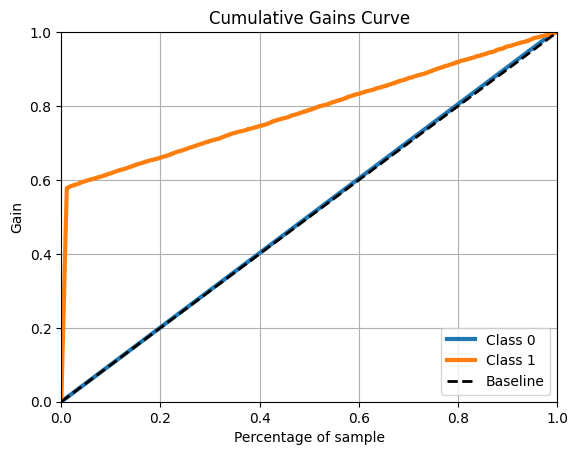

In [100]:
predicted_probas = classifier.predict_proba(X_test)

# The magic happens here
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
plt.show()

In [101]:
features = X.columns.tolist()
importances_sk = classifier.feature_importances_
feature_importance_sk = {}
for i, feature in enumerate(features):
    feature_importance_sk[feature] = round(importances_sk[i], 3)

feature_importance_sk

{'speed_id_1': 0.024,
 'distance_id_1': 0.023,
 'direction_id_1': 0.016,
 'orientation_id_1': 0.026,
 'acceleration_id_1': 0.027,
 'sa_id_1': 0.012,
 'speed_id_2': 0.018,
 'distance_id_2': 0.011,
 'direction_id_2': 0.018,
 'orientation_id_2': 0.026,
 'acceleration_id_2': 0.018,
 'sa_id_2': 0.012,
 'speed_diff_w_lag1_lag2_id_1': 0.01,
 'distance_diff_w_lag1_lag2_id_1': 0.005,
 'direction_diff_w_lag1_lag2_id_1': 0.015,
 'orientation_diff_w_lag1_lag2_id_1': 0.012,
 'acceleration_diff_w_lag1_lag2_id_1': 0.011,
 'sa_diff_w_lag1_lag2_id_1': 0.013,
 'speed_diff_w_lag1_id_1': 0.008,
 'distance_diff_w_lag1_id_1': 0.005,
 'direction_diff_w_lag1_id_1': 0.015,
 'orientation_diff_w_lag1_id_1': 0.013,
 'acceleration_diff_w_lag1_id_1': 0.012,
 'sa_diff_w_lag1_id_1': 0.012,
 'speed_diff_w_lag1_lag2_id_2': 0.009,
 'distance_diff_w_lag1_lag2_id_2': 0.005,
 'direction_diff_w_lag1_lag2_id_2': 0.014,
 'orientation_diff_w_lag1_lag2_id_2': 0.014,
 'acceleration_diff_w_lag1_lag2_id_2': 0.012,
 'sa_diff_w_lag1

In [102]:
df_imp = pd.DataFrame(columns=['feature', 'importance'])
list_imp = []
for feat, value in feature_importance_sk.items():
    list_imp.append((feat,value))

In [103]:
pd.Series(feature_importance_sk).sort_values(ascending=False)

dist                                  0.452
acceleration_id_1                     0.027
orientation_id_2                      0.026
orientation_id_1                      0.026
speed_id_1                            0.024
distance_id_1                         0.023
speed_id_2                            0.018
acceleration_id_2                     0.018
direction_id_2                        0.018
dist_current_lag1                     0.016
direction_id_1                        0.016
direction_diff_w_lag1_id_1            0.015
dist_lag1_lag2                        0.015
direction_diff_w_lag1_lag2_id_1       0.015
direction_diff_w_lag1_id_2            0.014
orientation_diff_w_lag1_lag2_id_2     0.014
direction_diff_w_lag1_lag2_id_2       0.014
sa_diff_w_lag1_lag2_id_2              0.013
orientation_diff_w_lag1_id_1          0.013
orientation_diff_w_lag1_id_2          0.013
dist_lag2                             0.013
sa_diff_w_lag1_lag2_id_1              0.013
sa_diff_w_lag1_id_2             

In [104]:
pd.Series(feature_importance_sk).shape

(41,)

In [105]:
list1= pd.Series(feature_importance_sk).index.to_list()
list2= list(set(pd.Series(feature_importance_sk).index.to_list()))

print(len(list1))
print(len(list2))

41
41


#### XG Boost


In [63]:
from xgboost import XGBClassifier

In [64]:
X_train.columns

Index(['speed_id_1', 'distance_id_1', 'direction_id_1', 'orientation_id_1',
       'acceleration_id_1', 'sa_id_1', 'speed_id_2', 'distance_id_2',
       'direction_id_2', 'orientation_id_2', 'acceleration_id_2', 'sa_id_2',
       'speed_diff_w_lag1_lag2_id_1', 'distance_diff_w_lag1_lag2_id_1',
       'direction_diff_w_lag1_lag2_id_1', 'orientation_diff_w_lag1_lag2_id_1',
       'acceleration_diff_w_lag1_lag2_id_1', 'sa_diff_w_lag1_lag2_id_1',
       'speed_diff_w_lag1_id_1', 'distance_diff_w_lag1_id_1',
       'direction_diff_w_lag1_id_1', 'orientation_diff_w_lag1_id_1',
       'acceleration_diff_w_lag1_id_1', 'sa_diff_w_lag1_id_1',
       'speed_diff_w_lag1_lag2_id_2', 'distance_diff_w_lag1_lag2_id_2',
       'direction_diff_w_lag1_lag2_id_2', 'orientation_diff_w_lag1_lag2_id_2',
       'acceleration_diff_w_lag1_lag2_id_2', 'sa_diff_w_lag1_lag2_id_2',
       'speed_diff_w_lag1_id_2', 'distance_diff_w_lag1_id_2',
       'direction_diff_w_lag1_id_2', 'orientation_diff_w_lag1_id_2',
    

In [65]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [68]:
y_pred_xgb = model.predict(X_test)

In [69]:

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[850591   2037]
 [  3554   6015]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    852628
           1       0.75      0.63      0.68      9569

    accuracy                           0.99    862197
   macro avg       0.87      0.81      0.84    862197
weighted avg       0.99      0.99      0.99    862197



In [70]:

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[850591   2037]
 [  3554   6015]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    852628
           1       0.75      0.63      0.68      9569

    accuracy                           0.99    862197
   macro avg       0.87      0.81      0.84    862197
weighted avg       0.99      0.99      0.99    862197



In [71]:
matthews_corrcoef(y_test, y_pred_xgb)

0.6820413447900698

#### Where did the predictions go wrong

In [72]:
probs = model.predict_proba(X_test)

In [76]:
y_pred_035 = np.where(probs >0.35, 1,0)[:,1]

In [77]:
y_pred_035

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
matthews_corrcoef(y_test, y_pred_035)

0.6998848731844005

In [82]:
X_test.head()

,speed_id_1,distance_id_1,direction_id_1,orientation_id_1,acceleration_id_1,sa_id_1,speed_id_2,distance_id_2,direction_id_2,orientation_id_2,acceleration_id_2,sa_id_2,speed_diff_w_lag1_lag2_id_1,distance_diff_w_lag1_lag2_id_1,direction_diff_w_lag1_lag2_id_1,orientation_diff_w_lag1_lag2_id_1,acceleration_diff_w_lag1_lag2_id_1,sa_diff_w_lag1_lag2_id_1,speed_diff_w_lag1_id_1,distance_diff_w_lag1_id_1,direction_diff_w_lag1_id_1,orientation_diff_w_lag1_id_1,acceleration_diff_w_lag1_id_1,sa_diff_w_lag1_id_1,speed_diff_w_lag1_lag2_id_2,distance_diff_w_lag1_lag2_id_2,direction_diff_w_lag1_lag2_id_2,orientation_diff_w_lag1_lag2_id_2,acceleration_diff_w_lag1_lag2_id_2,sa_diff_w_lag1_lag2_id_2,speed_diff_w_lag1_id_2,distance_diff_w_lag1_id_2,direction_diff_w_lag1_id_2,orientation_diff_w_lag1_id_2,acceleration_diff_w_lag1_id_2,sa_diff_w_lag1_id_2,dist_lag2,dist_lag1,dist,dist_lag1_lag2,dist_current_lag1,intersects_at_step,intersects_in_play,distance_at_step,player_angle
982994,1.96,0.20,345.99,327.77,1.19,-1.19,1.56,0.16,325.41,314.85,1.07,-1.02,-0.12,-0.02,-0.09,-1.10,-0.03,0.03,-0.13,-0.01,0.20,-1.01,-0.01,0.01,-0.11,-0.01,-1.14,-0.80,-0.10,0.11,-0.10,-0.01,-1.35,-0.57,-0.11,0.10,4.112542,4.065969,4.021206,-0.046573,-0.044762,0.0,0.0,4.021188,0.076260
3498399,2.62,0.27,4.26,332.23,2.63,-1.79,1.82,0.19,342.35,320.50,1.58,-0.97,-0.22,-0.02,3.86,2.35,-0.13,0.25,-0.18,-0.02,-354.36,7.04,-0.01,0.35,-0.09,0.00,6.44,-2.03,0.08,0.06,-0.07,-0.01,5.99,-0.61,0.00,0.10,10.154216,10.066365,9.972527,-0.087851,-0.093838,0.0,0.0,9.972506,6.145772
1287344,0.48,0.05,271.70,270.17,0.52,0.51,1.14,0.11,90.53,75.63,0.71,0.05,0.12,0.01,-5.23,-1.47,0.24,0.23,0.07,0.01,-2.55,-3.60,0.00,0.00,0.02,0.00,-4.27,-5.22,-0.18,0.12,-0.01,0.00,-4.00,-5.70,-0.15,-0.07,22.798952,22.730132,22.644507,-0.068820,-0.085625,0.0,0.0,22.644528,1.117870
1221767,1.24,0.14,86.14,330.21,2.55,-2.55,2.52,0.26,96.78,125.73,1.78,-1.67,-0.26,-0.02,0.01,0.00,0.75,-0.77,-0.33,-0.03,0.51,0.00,0.44,-0.44,-0.11,-0.01,2.06,0.00,0.30,-0.31,-0.18,-0.02,2.69,1.38,0.31,-0.29,4.985278,4.871027,4.753988,-0.114252,-0.117039,0.0,0.0,4.753980,6.164923
2179625,2.78,0.29,351.03,356.36,2.01,-1.99,1.08,0.10,320.58,353.13,0.82,0.76,-0.22,-0.02,-0.57,1.44,0.00,-0.02,-0.23,-0.02,-0.78,-0.70,0.01,-0.03,0.13,0.01,3.21,-1.19,-0.14,-0.05,0.10,0.01,1.06,0.00,-0.19,-0.12,21.097891,21.334538,21.525689,0.236647,0.191152,0.0,0.0,21.525714,1.054510


In [83]:
X_test['predictions'] = y_pred_xgb

/var/folders/z2/rdt7vxy91fz7f7gkqbtqbgk40000gn/T/ipykernel_3284/4033270748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['predictions'] = y_pred_xgb


In [89]:
X_test['ground_truth'] = y_test

/var/folders/z2/rdt7vxy91fz7f7gkqbtqbgk40000gn/T/ipykernel_3284/509686785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['ground_truth'] = y_test


In [110]:
model.predict_proba(X_test.drop('predictions',axis=1).drop('ground_truth',axis=1))[:,1]

array([8.5389402e-06, 8.6650380e-07, 3.9395289e-07, ..., 1.2236311e-05,
       1.3185790e-05, 1.0346340e-06], dtype=float32)

In [111]:
X_test['predictions_prob'] = model.predict_proba(X_test.drop('predictions',axis=1).drop('ground_truth',axis=1))[:,1]

/var/folders/z2/rdt7vxy91fz7f7gkqbtqbgk40000gn/T/ipykernel_3284/1627270958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['predictions_prob'] = model.predict_proba(X_test.drop('predictions',axis=1).drop('ground_truth',axis=1))[:,1]


In [138]:
 X_test['y_pred_035'] = np.where(X_test['predictions_prob'] >0.35, 1,0)

/var/folders/z2/rdt7vxy91fz7f7gkqbtqbgk40000gn/T/ipykernel_3284/3534584843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['y_pred_035'] = np.where(X_test['predictions_prob'] >0.35, 1,0)


In [139]:
matthews_corrcoef(y_test, X_test['y_pred_035'])

0.707744802362831

In [112]:
X_test.head()

,speed_id_1,distance_id_1,direction_id_1,orientation_id_1,acceleration_id_1,sa_id_1,speed_id_2,distance_id_2,direction_id_2,orientation_id_2,acceleration_id_2,sa_id_2,speed_diff_w_lag1_lag2_id_1,distance_diff_w_lag1_lag2_id_1,direction_diff_w_lag1_lag2_id_1,orientation_diff_w_lag1_lag2_id_1,acceleration_diff_w_lag1_lag2_id_1,sa_diff_w_lag1_lag2_id_1,speed_diff_w_lag1_id_1,distance_diff_w_lag1_id_1,direction_diff_w_lag1_id_1,orientation_diff_w_lag1_id_1,acceleration_diff_w_lag1_id_1,sa_diff_w_lag1_id_1,speed_diff_w_lag1_lag2_id_2,distance_diff_w_lag1_lag2_id_2,direction_diff_w_lag1_lag2_id_2,orientation_diff_w_lag1_lag2_id_2,acceleration_diff_w_lag1_lag2_id_2,sa_diff_w_lag1_lag2_id_2,speed_diff_w_lag1_id_2,distance_diff_w_lag1_id_2,direction_diff_w_lag1_id_2,orientation_diff_w_lag1_id_2,acceleration_diff_w_lag1_id_2,sa_diff_w_lag1_id_2,dist_lag2,dist_lag1,dist,dist_lag1_lag2,dist_current_lag1,intersects_at_step,intersects_in_play,distance_at_step,player_angle,predictions,ground_truth,predictions_prob
982994,1.96,0.20,345.99,327.77,1.19,-1.19,1.56,0.16,325.41,314.85,1.07,-1.02,-0.12,-0.02,-0.09,-1.10,-0.03,0.03,-0.13,-0.01,0.20,-1.01,-0.01,0.01,-0.11,-0.01,-1.14,-0.80,-0.10,0.11,-0.10,-0.01,-1.35,-0.57,-0.11,0.10,4.112542,4.065969,4.021206,-0.046573,-0.044762,0.0,0.0,4.021188,0.076260,0,0,8.538940e-06
3498399,2.62,0.27,4.26,332.23,2.63,-1.79,1.82,0.19,342.35,320.50,1.58,-0.97,-0.22,-0.02,3.86,2.35,-0.13,0.25,-0.18,-0.02,-354.36,7.04,-0.01,0.35,-0.09,0.00,6.44,-2.03,0.08,0.06,-0.07,-0.01,5.99,-0.61,0.00,0.10,10.154216,10.066365,9.972527,-0.087851,-0.093838,0.0,0.0,9.972506,6.145772,0,0,8.665038e-07
1287344,0.48,0.05,271.70,270.17,0.52,0.51,1.14,0.11,90.53,75.63,0.71,0.05,0.12,0.01,-5.23,-1.47,0.24,0.23,0.07,0.01,-2.55,-3.60,0.00,0.00,0.02,0.00,-4.27,-5.22,-0.18,0.12,-0.01,0.00,-4.00,-5.70,-0.15,-0.07,22.798952,22.730132,22.644507,-0.068820,-0.085625,0.0,0.0,22.644528,1.117870,0,0,3.939529e-07
1221767,1.24,0.14,86.14,330.21,2.55,-2.55,2.52,0.26,96.78,125.73,1.78,-1.67,-0.26,-0.02,0.01,0.00,0.75,-0.77,-0.33,-0.03,0.51,0.00,0.44,-0.44,-0.11,-0.01,2.06,0.00,0.30,-0.31,-0.18,-0.02,2.69,1.38,0.31,-0.29,4.985278,4.871027,4.753988,-0.114252,-0.117039,0.0,0.0,4.753980,6.164923,0,0,1.865577e-05
2179625,2.78,0.29,351.03,356.36,2.01,-1.99,1.08,0.10,320.58,353.13,0.82,0.76,-0.22,-0.02,-0.57,1.44,0.00,-0.02,-0.23,-0.02,-0.78,-0.70,0.01,-0.03,0.13,0.01,3.21,-1.19,-0.14,-0.05,0.10,0.01,1.06,0.00,-0.19,-0.12,21.097891,21.334538,21.525689,0.236647,0.191152,0.0,0.0,21.525714,1.054510,0,0,5.676065e-07


In [122]:
df_miss = X_test.merge(data_train_pp[['nfl_player_id_1', 'nfl_player_id_2','game_play', 'datetime', 'step','jersey_number_id_1', 'jersey_number_id_2','contact']], left_index=True, right_index=True)

In [123]:
df_miss.head()

,speed_id_1,distance_id_1,direction_id_1,orientation_id_1,acceleration_id_1,sa_id_1,speed_id_2,distance_id_2,direction_id_2,orientation_id_2,acceleration_id_2,sa_id_2,speed_diff_w_lag1_lag2_id_1,distance_diff_w_lag1_lag2_id_1,direction_diff_w_lag1_lag2_id_1,orientation_diff_w_lag1_lag2_id_1,acceleration_diff_w_lag1_lag2_id_1,sa_diff_w_lag1_lag2_id_1,speed_diff_w_lag1_id_1,distance_diff_w_lag1_id_1,direction_diff_w_lag1_id_1,orientation_diff_w_lag1_id_1,acceleration_diff_w_lag1_id_1,sa_diff_w_lag1_id_1,speed_diff_w_lag1_lag2_id_2,distance_diff_w_lag1_lag2_id_2,direction_diff_w_lag1_lag2_id_2,orientation_diff_w_lag1_lag2_id_2,acceleration_diff_w_lag1_lag2_id_2,sa_diff_w_lag1_lag2_id_2,speed_diff_w_lag1_id_2,distance_diff_w_lag1_id_2,direction_diff_w_lag1_id_2,orientation_diff_w_lag1_id_2,acceleration_diff_w_lag1_id_2,sa_diff_w_lag1_id_2,dist_lag2,dist_lag1,dist,dist_lag1_lag2,dist_current_lag1,intersects_at_step,intersects_in_play,distance_at_step,player_angle,predictions,ground_truth,predictions_prob,y_pred_035,nfl_player_id_1,nfl_player_id_2,game_play,datetime,step,jersey_number_id_1,jersey_number_id_2,contact
982994,1.96,0.20,345.99,327.77,1.19,-1.19,1.56,0.16,325.41,314.85,1.07,-1.02,-0.12,-0.02,-0.09,-1.10,-0.03,0.03,-0.13,-0.01,0.20,-1.01,-0.01,0.01,-0.11,-0.01,-1.14,-0.80,-0.10,0.11,-0.10,-0.01,-1.35,-0.57,-0.11,0.10,4.112542,4.065969,4.021206,-0.046573,-0.044762,0.0,0.0,4.021188,0.076260,0,0,8.538940e-06,0,40399,42569,58219_002964,2020-10-04T19:17:50.100Z,81,95,68.0,0
3498399,2.62,0.27,4.26,332.23,2.63,-1.79,1.82,0.19,342.35,320.50,1.58,-0.97,-0.22,-0.02,3.86,2.35,-0.13,0.25,-0.18,-0.02,-354.36,7.04,-0.01,0.35,-0.09,0.00,6.44,-2.03,0.08,0.06,-0.07,-0.01,5.99,-0.61,0.00,0.10,10.154216,10.066365,9.972527,-0.087851,-0.093838,0.0,0.0,9.972506,6.145772,0,0,8.665038e-07,0,47844,48159,58517_003494,2021-09-13T03:04:02.200Z,66,24,67.0,0
1287344,0.48,0.05,271.70,270.17,0.52,0.51,1.14,0.11,90.53,75.63,0.71,0.05,0.12,0.01,-5.23,-1.47,0.24,0.23,0.07,0.01,-2.55,-3.60,0.00,0.00,0.02,0.00,-4.27,-5.22,-0.18,0.12,-0.01,0.00,-4.00,-5.70,-0.15,-0.07,22.798952,22.730132,22.644507,-0.068820,-0.085625,0.0,0.0,22.644528,1.117870,0,0,3.939529e-07,0,37174,44902,58245_002594,2020-10-12T02:25:03.400Z,55,50,26.0,0
1221767,1.24,0.14,86.14,330.21,2.55,-2.55,2.52,0.26,96.78,125.73,1.78,-1.67,-0.26,-0.02,0.01,0.00,0.75,-0.77,-0.33,-0.03,0.51,0.00,0.44,-0.44,-0.11,-0.01,2.06,0.00,0.30,-0.31,-0.18,-0.02,2.69,1.38,0.31,-0.29,4.985278,4.871027,4.753988,-0.114252,-0.117039,0.0,0.0,4.753980,6.164923,0,0,1.865577e-05,0,33084,39992,58233_001668,2020-10-11T18:09:04.800Z,20,2,99.0,0
2179625,2.78,0.29,351.03,356.36,2.01,-1.99,1.08,0.10,320.58,353.13,0.82,0.76,-0.22,-0.02,-0.57,1.44,0.00,-0.02,-0.23,-0.02,-0.78,-0.70,0.01,-0.03,0.13,0.01,3.21,-1.19,-0.14,-0.05,0.10,0.01,1.06,0.00,-0.19,-0.12,21.097891,21.334538,21.525689,0.236647,0.191152,0.0,0.0,21.525714,1.054510,0,0,5.676065e-07,0,37174,43362,58316_002463,2020-11-20T03:13:06.600Z,68,50,41.0,0


In [142]:
df_miss[(df_miss.jersey_number_id_1==92) & (df_miss.jersey_number_id_1==70)]

,speed_id_1,distance_id_1,direction_id_1,orientation_id_1,acceleration_id_1,sa_id_1,speed_id_2,distance_id_2,direction_id_2,orientation_id_2,acceleration_id_2,sa_id_2,speed_diff_w_lag1_lag2_id_1,distance_diff_w_lag1_lag2_id_1,direction_diff_w_lag1_lag2_id_1,orientation_diff_w_lag1_lag2_id_1,acceleration_diff_w_lag1_lag2_id_1,sa_diff_w_lag1_lag2_id_1,speed_diff_w_lag1_id_1,distance_diff_w_lag1_id_1,direction_diff_w_lag1_id_1,orientation_diff_w_lag1_id_1,acceleration_diff_w_lag1_id_1,sa_diff_w_lag1_id_1,speed_diff_w_lag1_lag2_id_2,distance_diff_w_lag1_lag2_id_2,direction_diff_w_lag1_lag2_id_2,orientation_diff_w_lag1_lag2_id_2,acceleration_diff_w_lag1_lag2_id_2,sa_diff_w_lag1_lag2_id_2,speed_diff_w_lag1_id_2,distance_diff_w_lag1_id_2,direction_diff_w_lag1_id_2,orientation_diff_w_lag1_id_2,acceleration_diff_w_lag1_id_2,sa_diff_w_lag1_id_2,dist_lag2,dist_lag1,dist,dist_lag1_lag2,dist_current_lag1,intersects_at_step,intersects_in_play,distance_at_step,player_angle,predictions,ground_truth,predictions_prob,y_pred_035,nfl_player_id_1,nfl_player_id_2,game_play,datetime,step,jersey_number_id_1,jersey_number_id_2,contact


In [124]:
df_miss[(df_miss.predictions==0) & (df_miss.ground_truth==1)].head(100)

,speed_id_1,distance_id_1,direction_id_1,orientation_id_1,acceleration_id_1,sa_id_1,speed_id_2,distance_id_2,direction_id_2,orientation_id_2,acceleration_id_2,sa_id_2,speed_diff_w_lag1_lag2_id_1,distance_diff_w_lag1_lag2_id_1,direction_diff_w_lag1_lag2_id_1,orientation_diff_w_lag1_lag2_id_1,acceleration_diff_w_lag1_lag2_id_1,sa_diff_w_lag1_lag2_id_1,speed_diff_w_lag1_id_1,distance_diff_w_lag1_id_1,direction_diff_w_lag1_id_1,orientation_diff_w_lag1_id_1,acceleration_diff_w_lag1_id_1,sa_diff_w_lag1_id_1,speed_diff_w_lag1_lag2_id_2,distance_diff_w_lag1_lag2_id_2,direction_diff_w_lag1_lag2_id_2,orientation_diff_w_lag1_lag2_id_2,acceleration_diff_w_lag1_lag2_id_2,sa_diff_w_lag1_lag2_id_2,speed_diff_w_lag1_id_2,distance_diff_w_lag1_id_2,direction_diff_w_lag1_id_2,orientation_diff_w_lag1_id_2,acceleration_diff_w_lag1_id_2,sa_diff_w_lag1_id_2,dist_lag2,dist_lag1,dist,dist_lag1_lag2,dist_current_lag1,intersects_at_step,intersects_in_play,distance_at_step,player_angle,predictions,ground_truth,predictions_prob,y_pred_035,nfl_player_id_1,nfl_player_id_2,game_play,datetime,step,jersey_number_id_1,jersey_number_id_2,contact
4477550,1.29,0.13,247.81,284.05,0.52,-0.13,1.94,0.18,241.97,347.87,2.10,2.10,0.01,-0.01,-1.62,0.84,-0.25,-0.37,0.01,0.01,-3.72,1.53,0.01,-0.24,0.34,0.03,0.94,-2.50,-0.05,0.04,0.27,0.03,0.00,-1.55,-0.24,-0.23,1.023132,1.036967,1.080463,0.013834,0.043496,1.0,1.0,1.080460,0.005157,0,1,0.147667,0,33107,52492,58567_004074,2021-10-08T03:27:17.800Z,35,76,52.0,1
2950532,2.48,0.26,97.50,36.59,2.96,-1.65,2.51,0.26,131.94,96.55,2.58,-2.29,-0.21,-0.02,-6.54,-10.27,-0.24,0.22,-0.14,-0.01,-9.48,-10.25,-0.11,0.40,-0.18,-0.01,-2.53,-4.16,-0.15,0.04,-0.31,-0.04,-4.18,-14.07,0.17,-0.17,0.699214,0.723395,0.803057,0.024181,0.079662,1.0,1.0,0.803055,0.000699,0,1,0.398564,1,40074,47797,58418_002446,2021-01-03T19:54:55.100Z,28,92,63.0,1
3628450,1.06,0.11,169.99,238.02,2.40,2.38,2.47,0.25,115.39,163.29,2.20,2.19,0.32,0.03,-8.36,-1.49,0.00,0.00,0.35,0.05,-10.20,0.00,-0.16,-0.17,0.38,0.04,1.71,-25.20,-0.28,-0.28,0.44,0.05,0.41,10.72,-0.29,-0.29,1.888200,1.736260,1.547773,-0.151940,-0.188488,0.0,0.0,1.547770,0.014013,0,1,0.089254,0,41939,42826,58524_003049,2021-09-19T19:30:24.400Z,5,68,90.0,1
2302416,0.25,0.03,281.37,76.17,0.19,-0.06,0.29,0.03,9.85,53.72,1.39,-1.30,-0.05,-0.01,-8.93,2.62,-0.06,-0.04,0.00,0.01,-5.23,1.44,-0.05,-0.02,-0.15,-0.02,-0.27,-4.46,0.07,-0.10,-0.19,-0.02,-13.63,-4.80,0.06,0.03,0.781025,0.743303,0.717008,-0.037722,-0.026296,0.0,0.0,0.717009,0.058892,0,1,0.172192,0,39146,46445,58327_004116,2020-11-23T04:25:34.300Z,15,75,48.0,1
2914096,1.03,0.10,193.01,61.58,1.85,0.95,1.82,0.20,36.55,288.92,3.14,-3.14,0.05,0.01,14.21,-6.75,-0.52,0.40,0.14,0.01,11.11,-14.05,-0.37,0.27,-0.36,-0.03,-0.56,-4.23,0.01,-0.22,-0.44,-0.04,-2.32,6.27,0.34,-0.40,0.966282,1.167090,1.400036,0.200809,0.232945,0.0,0.0,1.400031,0.067569,0,1,0.316980,0,42033,43341,58418_000637,2021-01-03T18:24:45.300Z,79,84,45.0,1
259651,1.01,0.11,336.59,340.47,0.40,0.29,0.28,0.02,250.61,165.67,0.12,-0.10,0.08,0.00,-6.02,-7.21,-0.02,-0.11,0.10,0.02,-1.98,-10.03,-0.12,-0.12,0.00,0.00,-2.81,5.58,-0.20,-0.19,-0.07,-0.01,-4.29,7.53,-0.06,-0.26,1.288099,1.208305,1.132078,-0.079795,-0.076227,0.0,0.0,1.132078,6.257481,0,1,0.027896,0,42355,44068,58187_002329,2020-09-20T18:46:45.900Z,37,71,62.0,1
379047,0.37,0.02,203.57,224.44,3.53,2.31,0.56,0.06,121.59,11.88,0.82,-0.72,-0.34,-0.03,45.62,7.09,-0.39,2.69,0.09,-0.02,56.44,11.34,-0.57,3.46,-0.07,-0.01,8.21,-0.95,-0.03,0.05,-0.08,-0.01,-0.66,0.00,-0.20,-0.02,1.578132,1.570350,1.534438,-0.007782,-0.035912,1.0,1.0,1.534438,0.032748,0,1,0.027293,0,42416,47786,58190_000309,2020-09-20T17:13:14.200Z,51,26,95.0,1
1936029,0.83,0.08,9.00,111.36,0.53,-0.09,1.41,0.15,40.60,337.88,0.63,-0.63,0.02,0.01,-4.36,-17.07,0.22,0.01,0.01,-0.01,-7.69,-15.95,0.24,-0.03,0.00,0.00,-1.22,0.00,0.07,-0.05,-0.06,0.00,2.87,10.46,0.12,-0.14,0.846463,0.862786,0.907855,0.016323,0.045068,1.0,1.0,0.907854,6.250399,0,1,0.280528,0,43419,47942,58301_002557,2020-11-10T03:09:30.

In [125]:
features = X.columns.tolist()
importances_xgb = model.feature_importances_
feature_importance_xgb = {}
for i, feature in enumerate(features):
    feature_importance_xgb[feature] = round(importances_xgb[i], 3)

feature_importance_xgb

{'speed_id_1': 0.012,
 'distance_id_1': 0.014,
 'direction_id_1': 0.004,
 'orientation_id_1': 0.012,
 'acceleration_id_1': 0.012,
 'sa_id_1': 0.003,
 'speed_id_2': 0.008,
 'distance_id_2': 0.007,
 'direction_id_2': 0.004,
 'orientation_id_2': 0.007,
 'acceleration_id_2': 0.008,
 'sa_id_2': 0.003,
 'speed_diff_w_lag1_lag2_id_1': 0.004,
 'distance_diff_w_lag1_lag2_id_1': 0.002,
 'direction_diff_w_lag1_lag2_id_1': 0.003,
 'orientation_diff_w_lag1_lag2_id_1': 0.002,
 'acceleration_diff_w_lag1_lag2_id_1': 0.004,
 'sa_diff_w_lag1_lag2_id_1': 0.005,
 'speed_diff_w_lag1_id_1': 0.004,
 'distance_diff_w_lag1_id_1': 0.003,
 'direction_diff_w_lag1_id_1': 0.004,
 'orientation_diff_w_lag1_id_1': 0.003,
 'acceleration_diff_w_lag1_id_1': 0.003,
 'sa_diff_w_lag1_id_1': 0.004,
 'speed_diff_w_lag1_lag2_id_2': 0.004,
 'distance_diff_w_lag1_lag2_id_2': 0.002,
 'direction_diff_w_lag1_lag2_id_2': 0.003,
 'orientation_diff_w_lag1_lag2_id_2': 0.003,
 'acceleration_diff_w_lag1_lag2_id_2': 0.003,
 'sa_diff_w_lag

In [126]:
df_imp = pd.DataFrame(columns=['feature', 'importance'])
list_imp = []
for feat, value in feature_importance_xgb.items():
    list_imp.append((feat,value))

In [127]:
pd.Series(feature_importance_xgb).sort_values(ascending=False)

distance_at_step                      0.775
distance_id_1                         0.014
intersects_at_step                    0.013
speed_id_1                            0.012
orientation_id_1                      0.012
acceleration_id_1                     0.012
dist                                  0.009
speed_id_2                            0.008
acceleration_id_2                     0.008
distance_id_2                         0.007
orientation_id_2                      0.007
dist_lag1_lag2                        0.006
dist_current_lag1                     0.006
dist_lag2                             0.005
sa_diff_w_lag1_lag2_id_1              0.005
sa_diff_w_lag1_lag2_id_2              0.005
dist_lag1                             0.004
sa_diff_w_lag1_id_2                   0.004
direction_diff_w_lag1_id_2            0.004
speed_diff_w_lag1_id_2                0.004
speed_diff_w_lag1_lag2_id_2           0.004
sa_diff_w_lag1_id_1                   0.004
player_angle                    

#### Auto Sklearn

In [116]:
import autosklearn.classification

In [133]:
from sklearn.model_selection import train_test_split, StratifiedKFold
skf = StratifiedKFold(n_splits=5)

In [135]:
from autosklearn.metrics import (accuracy,
                                 f1,
                                 roc_auc,
                                 precision,
                                 average_precision,
                                 recall,
                                 log_loss)

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=7200,
    per_run_time_limit=3600,
                            max_models_on_disc=5,
                            memory_limit = 102400
        )
automl.fit(X_train, y_train)

[WARNING] [2023-02-06 16:27:26,518:Client-AutoML(1):02627918-a665-11ed-b0d3-367dda963ae1] Capping the per_run_time_limit to 3593.0 to have time for a least 2 models in each process.
[WARNING] [2023-02-06 17:28:17,114:Client-EnsembleBuilder] No runs were available to build an ensemble from


In [149]:
print(automl.leaderboard())

          rank  ensemble_weight  type  cost duration
model_id                                            
1            1              1.0  <NA>  <NA>     <NA>


In [139]:
predictions = automl.predict(X_test)
print("Accuracy score:", sklearn.metrics.accuracy_score(y_test, predictions))

NotImplementedError: Predict is currently not implemented for resampling strategy StratifiedKFold(n_splits=5, random_state=None, shuffle=False), please call refit().

In [121]:
import sklearn.datasets

In [122]:
X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state=1
)

In [126]:
automl = autosklearn.classification.AutoSklearnClassifier(
    tmp_folder="/tmp/autosklearn_classification_example_tmp",
    memory_limit = 102400,
)
automl.fit(X_train, y_train, dataset_name="breast_cancer")

Process ForkProcess-9:
Traceback (most recent call last):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/ET92ZFW/Projects/ML4Askuity/8_Hackathon/venv-hackathon/lib/python3.9/site-packages/autosklearn/util/logging_.py", line 317, in start_log_server
    receiver.serve_until_stopped()
  File "/Users/ET92ZFW/Projects/ML4Askuity/8_Hackathon/venv-hackathon/lib/python3.9/site-packages/autosklearn/util/logging_.py", line 347, in serve_until_stopped
    rd, wr, ex = select.select([self.socket.fileno()], [], [], self.timeout)
KeyboardInterrupt
Exception ignored in: <function WeakSet.__init__.<locals>._remove at 0x12d85c700>
Traceback (most recent call last)

KeyboardInterrupt: 